# Gaussian White Noise

Consider a time series ${w_t: t = 1, 2, ..., n}$. If the elements of the series, $w_i$ are independent and identically distributed (i.i.d.), with a mean of zero, variance $\sigma^2$ and no serial correlation, i.e. $\rm{Cor}(w_i, w_j) = 0$ for all $i \neq j$ then we say that the time series is discrete white noise (DWN).

If the values $w_i$ are drawn from a standard normal distribution (i.e. $w_t \sim N(0, \sigma^2)$)then the series is known as Gaussian White Noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

### Correllogram of a white noise process

In [2]:
wn_1 = np.random.normal(0.0, 1.0, 10000)

wn_1_ser = pd.Series(wn_1)

lag_list = list(range(0,51))

corr_func = [wn_1_ser.autocorr(lag=l) for l in lag_list]

Text(0.5,0,'Lag')

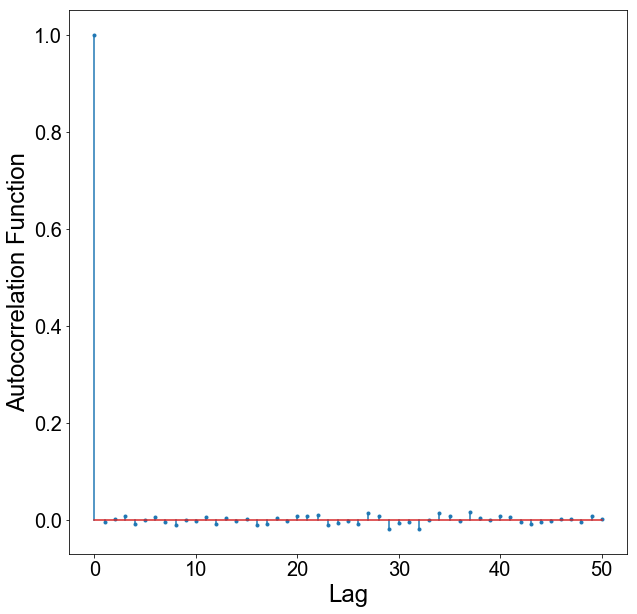

In [3]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (10,10),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

fig, ax = plt.subplots()
ax.stem(lag_list, corr_func, markerfmt='.')
plt.ylabel('Autocorrelation Function')
plt.xlabel('Lag')

## Random Walk

A random walk is a stochastic process $\{x_t\} : x_t = x_{t-1} + w_t$ where $w_t$ is a discrete white noise.

$\mathbb{E}(X_t) = 0 $

$var(X_t) = \sigma^2 t$

Autocorrelation function: $\rho_k(t) = \frac{1}{\sqrt{1 + k/t}$

In [4]:
def random_walk(sigma, end_time, n_steps, n_iterations):
    
    #inputs: end_time: Total time
    #        n_steps: number of time steps
    #        n_iterations: number of iterations
    
    #output: solution : a 2d array containing the random walks for various iterations
    
    dt = end_time/n_steps
    
    time_arr = np.arange(0.0, end_time, dt)
    
    increment_array = sigma*np.random.normal(0,np.sqrt(dt),(n_steps, n_iterations))
    
    solution = np.zeros_like(increment_array)

    solution[0] = 0.0
    
    for t in range(1, n_steps):
        solution[t] = solution[t-1] + increment_array[t]
    
    return time_arr, solution

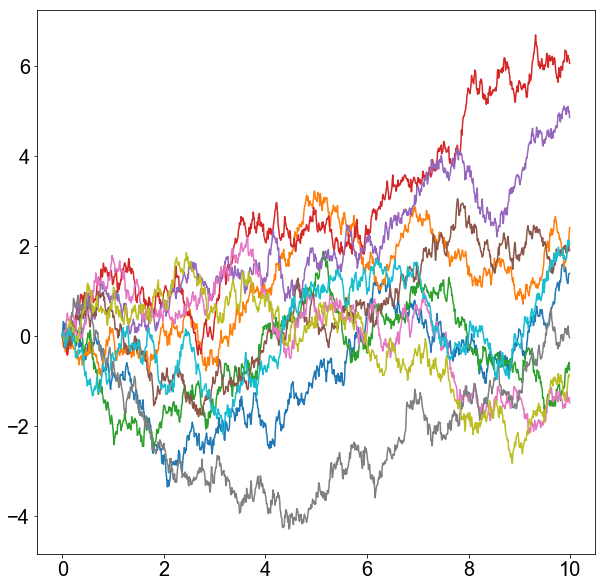

In [5]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (10,10),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

t = random_walk(1.0, 10.0, 1000, 100)[0]
sol = random_walk(1.0, 10.0, 1000, 100)[1]

plt.plot(t, sol[:,0:10])

### Correllogram of a random walk

In [10]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))[1][0]

In [19]:
r_walk = sol[:,1]
lag_list = list(range(1,51))
corr_walk = [autocorr(r_walk, l) for l in lag_list]

Text(0.5,0,'Lag')

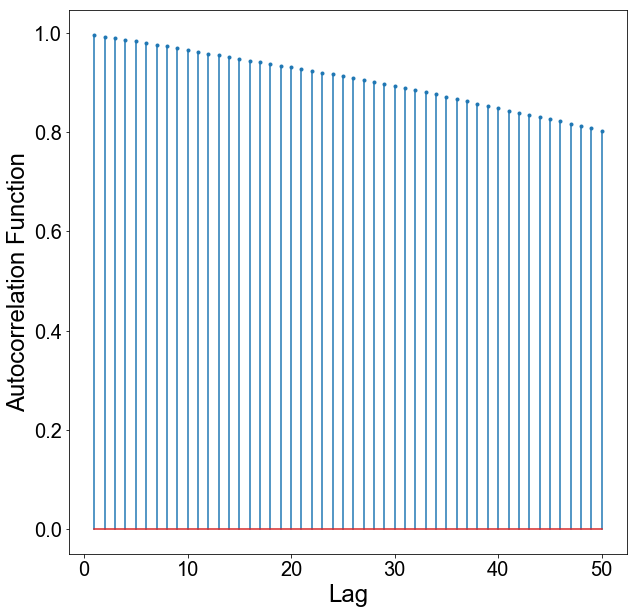

In [20]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (10,10),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

fig, ax = plt.subplots()
ax.stem(lag_list, corr_walk, markerfmt='.')
plt.ylabel('Autocorrelation Function')
plt.xlabel('Lag')